In [10]:
require('rstan')
require('invgamma')
require('tidyverse')
require('data.table')

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  3.0.1     ✔ purrr   0.3.4
✔ tidyr   0.8.3     ✔ dplyr   0.8.5
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  3.0.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ tidyr::extract()   masks rstan::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



### how do I get a dirichlet(2,1,1) to run?
Ok so I can do dirichlet(dl) where dl[1]=2, dl[2]=1 for M1 (see tmp_models6/m1_1.stan)


### Which priors do we want for M2??

inv_gamma(20,2)
inv_gamma(10,1)
inv_gamma(5,1)
inv_gamma(1,1)

dirichlet(2,1,1,1)
dirichlet(1,1,1,1)

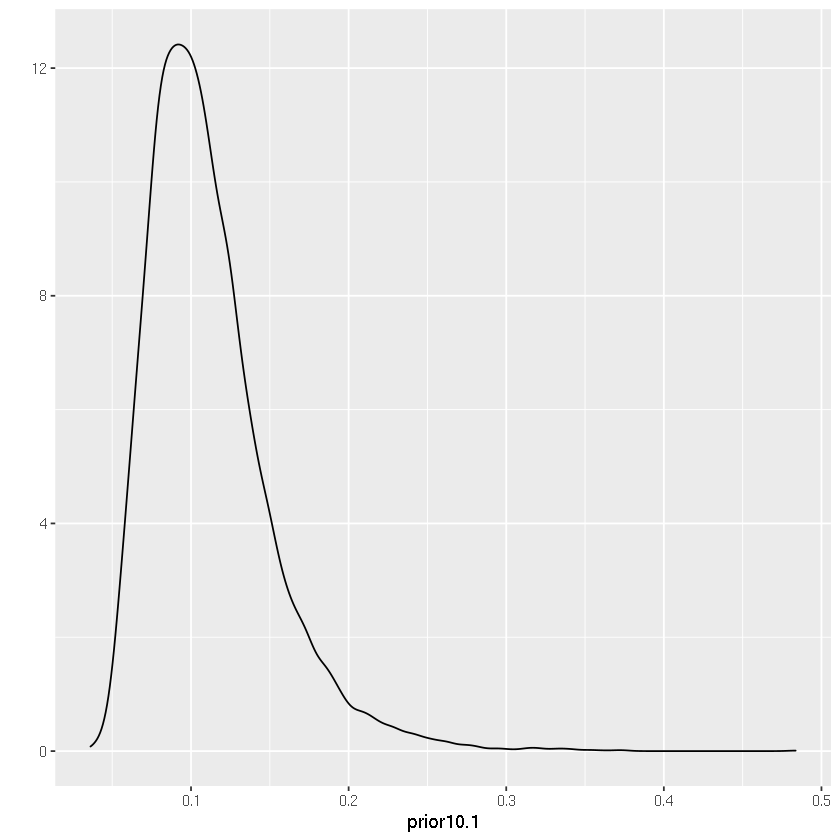

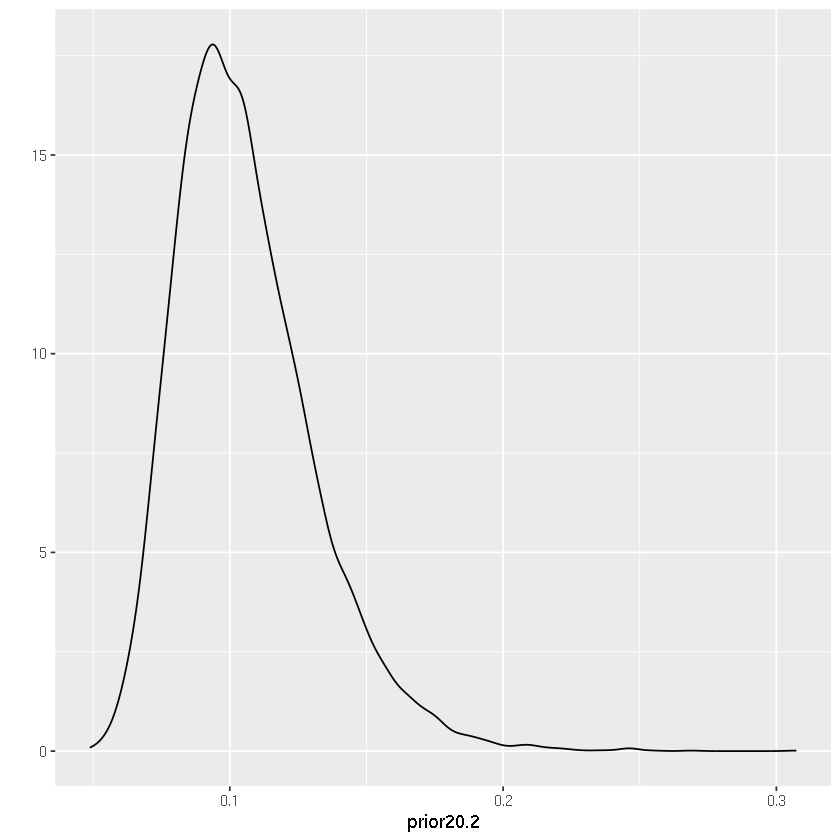

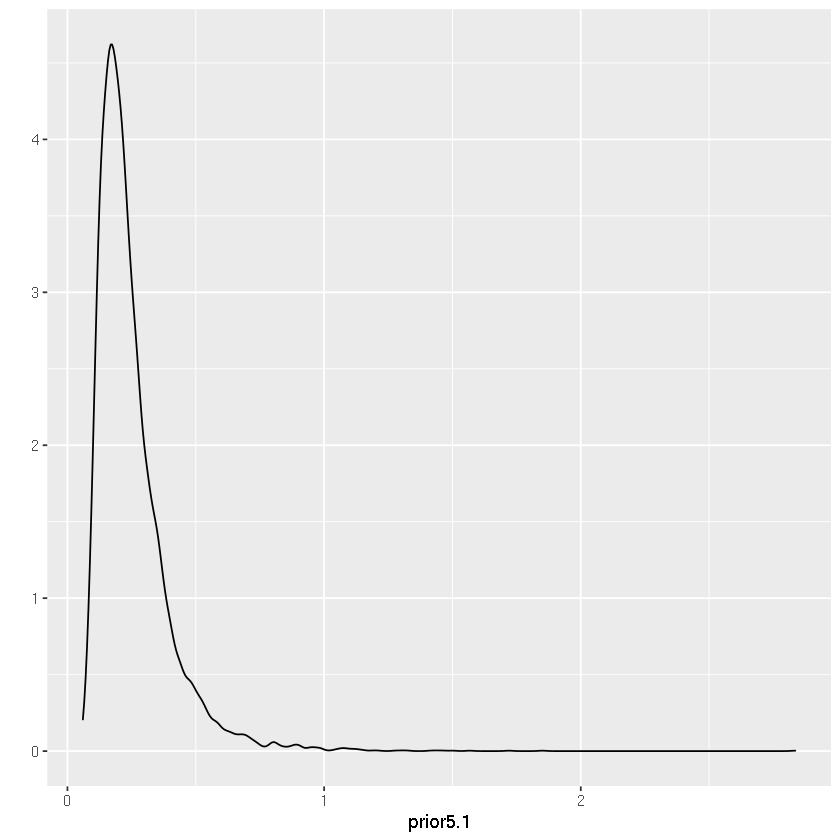

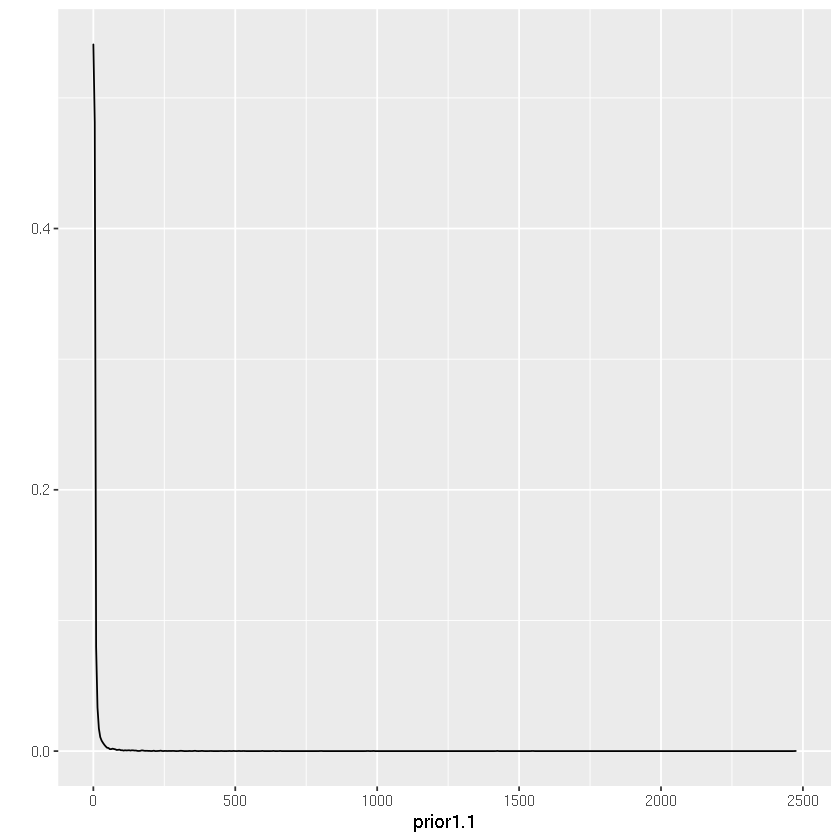

In [25]:
prior10.1 <- rinvgamma(10000, 10,1)
prior20.2 <- rinvgamma(10000, 20,2)
prior5.1 <- rinvgamma(10000, 5,1)
prior1.1 <- rinvgamma(10000, 1,1)

qplot(prior10.1, geom = "density")
qplot(prior20.2, geom = "density")
qplot(prior5.1, geom = "density")
qplot(prior1.1, geom = "density")

[1] 0.45879

[1] 1

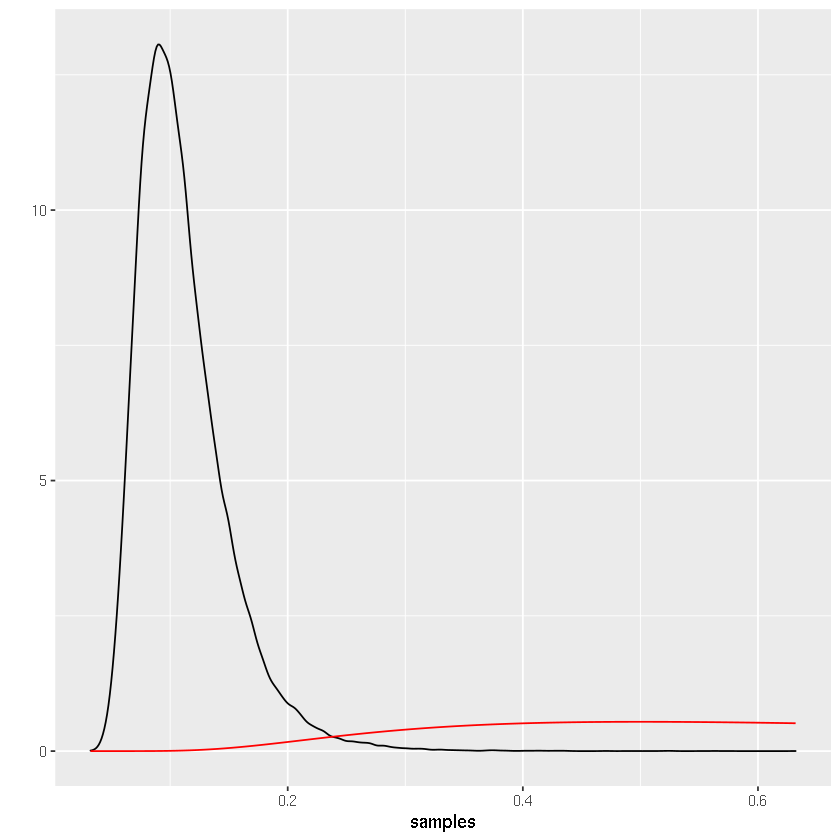

In [6]:
rinvgamma(10e4, 10, 1) -> samples 
mean(samples <= .1)
mean(samples <= 1)
f <- function(x) dinvgamma(x, 1, 1)
qplot(samples, geom = "density") + stat_function(fun = f, color = "red")

In [8]:
# read in the GWAS data
# does it look ok?
testosterone <- fread("../../../data/gwas/ukb24983_v2_hg19.Testosterone_zerosex.genotyped.glm.linear", data.table=FALSE)

Loading required package: data.table



In [19]:
sq_se <- sapply(testosterone$SE, function(x) x**2)

In [20]:
head(sq_se)
head(testosterone$SE)
length(sq_se)

[1] 1.067647e-04 1.361182e-05 1.046672e-04 1.048085e-04 1.369592e-05
[6] 1.416612e-05

[1] 0.01033270 0.00368942 0.01023070 0.01023760 0.00370080 0.00376379

[1] 804470

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 10793 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 10793 rows containing non-finite values (stat_density).”


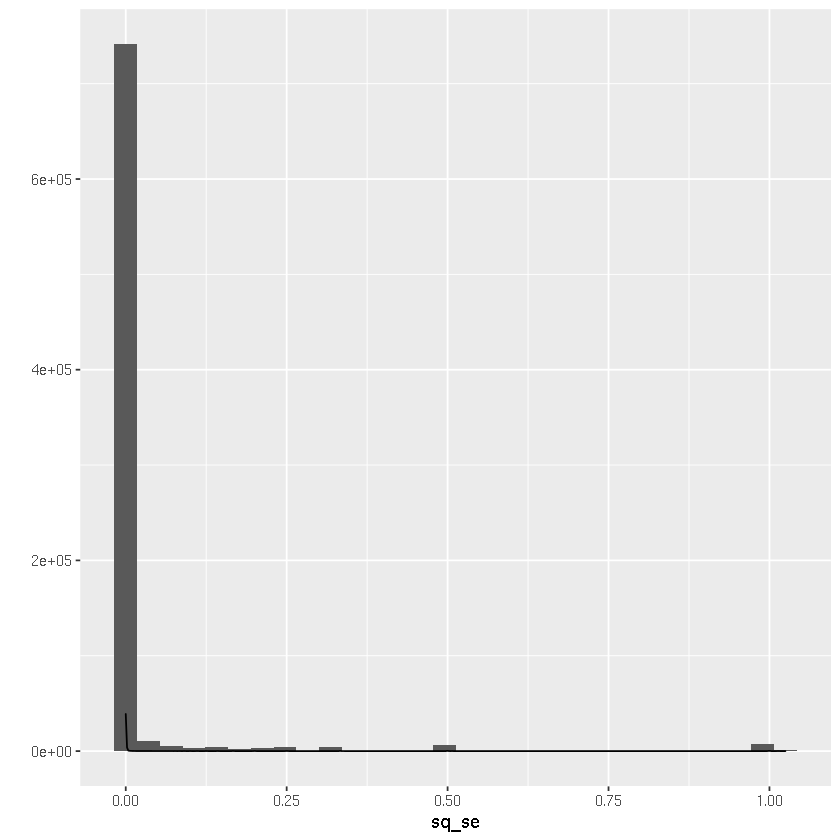

In [21]:
qplot(sq_se)+geom_density()

In [23]:
summary(sq_se)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.022   0.000   1.025   10793 

In [28]:
mean(sq_se, na.rm=TRUE)
sd(sq_se, na.rm=TRUE)**2

[1] 0.02177012

[1] 0.01370711

In [26]:
summary(prior10.1)
summary(prior20.2)
summary(prior5.1)
summary(prior1.1) # WAY OFF

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03623 0.08403 0.10432 0.11151 0.12969 0.48360 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04902 0.08777 0.10229 0.10583 0.11985 0.30704 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06009 0.15946 0.21432 0.25001 0.29978 2.83557 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   0.1084    0.7290    1.4607    6.9689    3.5217 2474.7414 

In [37]:
mean_ig <- function(alpha, beta) {beta/(alpha-1)}
var_ig <- function(alpha, beta) {
    res <- (beta**2)/(((alpha-1)**2)*(alpha-2)); return(res)}

In [38]:
mean_ig(10,1)
var_ig(10,1) # higher variance
mean_ig(20,2)
var_ig(20,2)

[1] 0.1111111

[1] 0.00154321

[1] 0.1052632

[1] 0.000615574

In [43]:
mean_ig(20,2)
var_ig(20,2)

[1] 0.08333333

[1] 0.0003019324

In [52]:
prior20.2 <- rinvgamma(100000, 20,2)


integer(0)

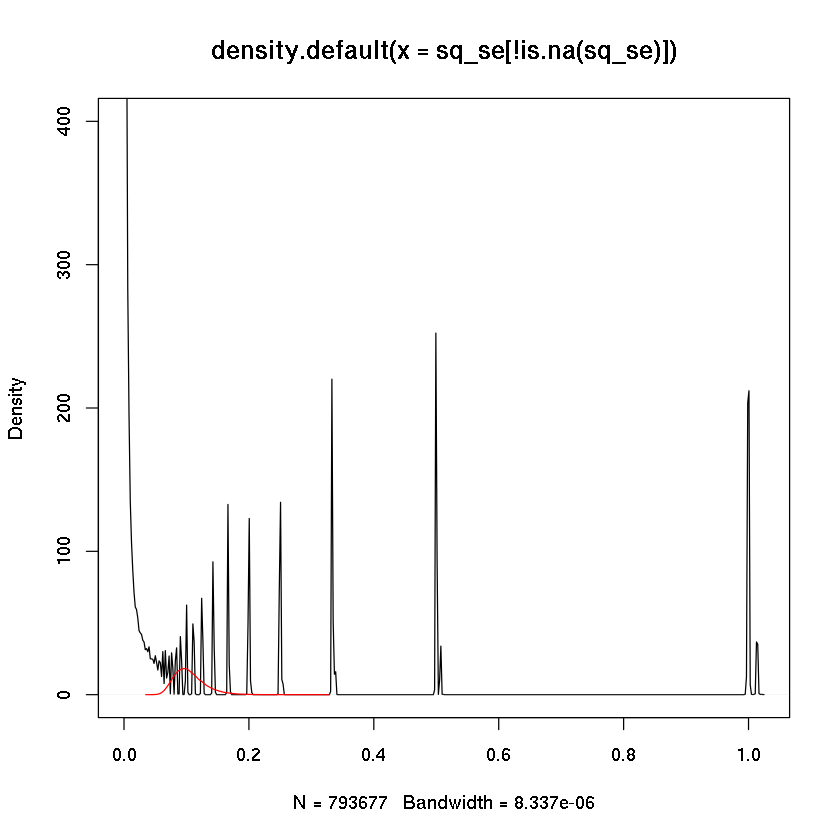

In [53]:
plot(density(sq_se[!is.na(sq_se)]), ylim=c(0,400))+lines(density(prior20.2), col="red")

integer(0)

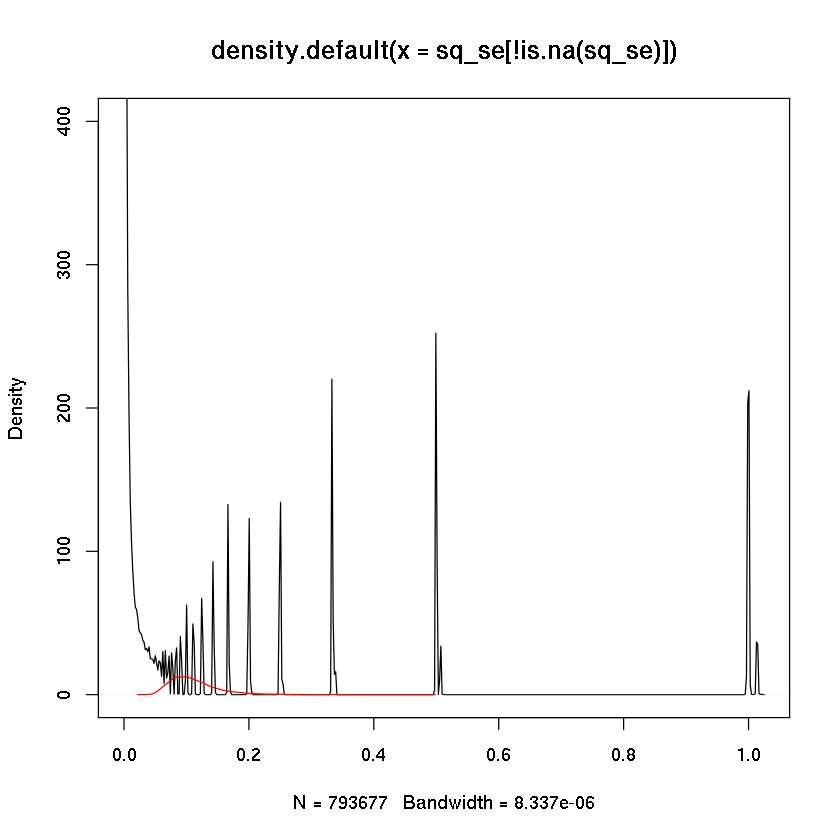

In [54]:
plot(density(sq_se[!is.na(sq_se)]), ylim=c(0,400))+lines(density(prior10.1), col="red")

### How do I visualize the dirichlet priors?
or just understand my choice

In [57]:
2/(2+1+1+2) # mean
(0.33*(1-0.33))/(6+1) # var

[1] 0.3333333

[1] 0.03158571

In [58]:
1/(2+1+1+2) # mean
(0.167*(1-0.167))/(6+1) # var

[1] 0.1666667

[1] 0.019873

In [59]:
1/4
(0.25*0.75)/(5)

[1] 0.25

[1] 0.0375

### Do my M1 priors make sense? is there anything else I should try?